In [1]:
import pandas as pd

In [3]:
#1.Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

import pandas as pd

df = pd.read_csv(r"C:\Users\soumi\Downloads\BIKE DETAILS.csv")
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [4]:
#2.Check for missing values in all columns and describe your approach for
#handling them.

import pandas as pd
df = pd.read_csv(r"C:\Users\soumi\Downloads\BIKE DETAILS.csv")
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


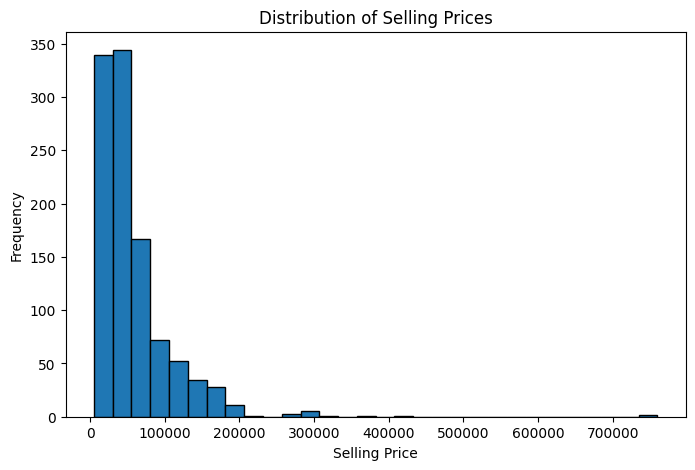

In [5]:
#3.Plot the distribution of selling prices using a histogram and describe the
#overall trend
import matplotlib.pyplot as plt

# Plot histogram for selling_price
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


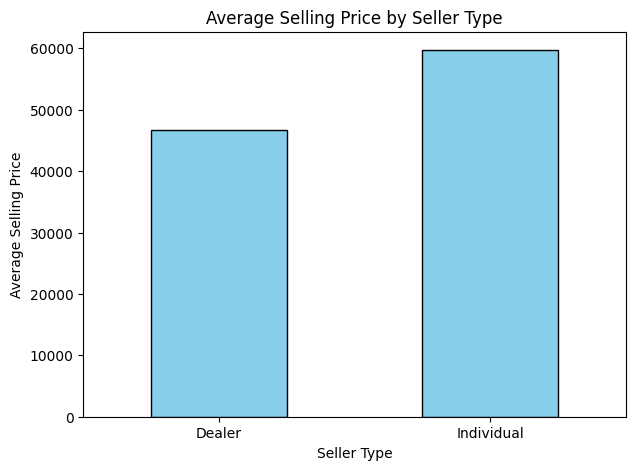

In [6]:
#4.Create a bar plot to visualize the average selling price for each seller_type
#and write one observation.

import matplotlib.pyplot as plt

# Group by seller_type and calculate mean selling price
avg_price = df.groupby("seller_type")["selling_price"].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()


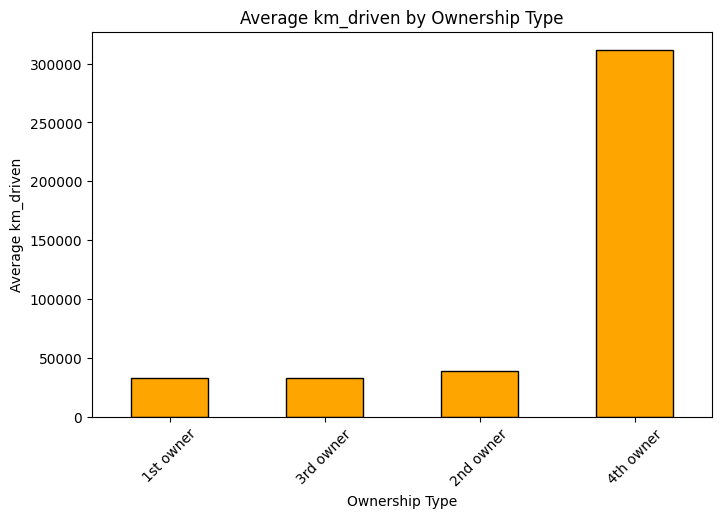

In [7]:
#5.Compute the average km_driven for each ownership type (1st owner,
#2nd owner, etc.), and present the result as a bar plot.

import matplotlib.pyplot as plt

# Group by ownership and compute mean km_driven
avg_km = df.groupby("owner")["km_driven"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_km.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Summary before removing outliers
print("Before removing outliers:")
print(df["km_driven"].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [9]:
#6.Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
 Calculate Q1, Q3 and IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]


In [10]:
print("\nAfter removing outliers:")
print(df_no_outliers["km_driven"].describe())



After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


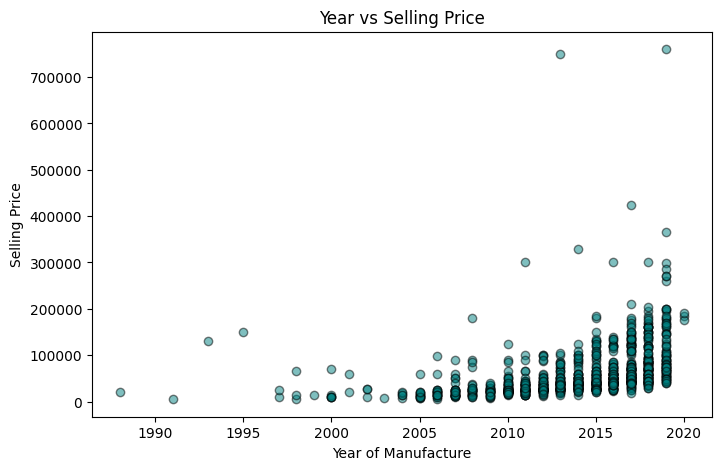

In [11]:
#7.Create a scatter plot of year vs. selling_price to explore the
#relationship between a bike's age and its price.

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, color="teal", edgecolor="k")

plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


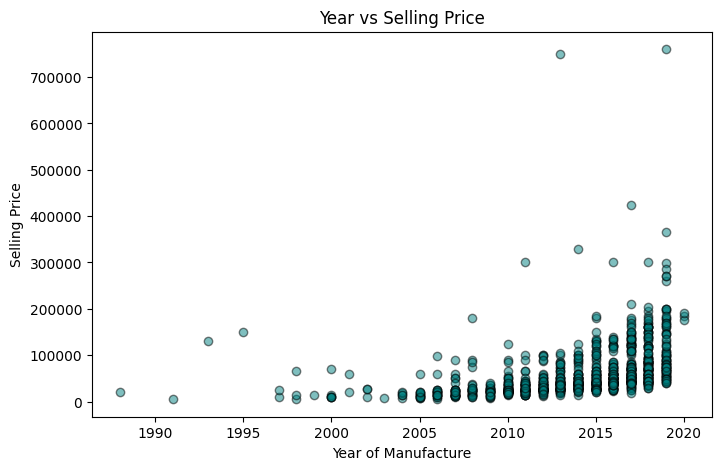

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["year"], df["selling_price"], alpha=0.5, color="teal", edgecolor="k")

plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


In [13]:
#8.Convert the seller_type column into numeric format using one-hot
#encoding. Display the first 5 rows of the resulting DataFrame
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


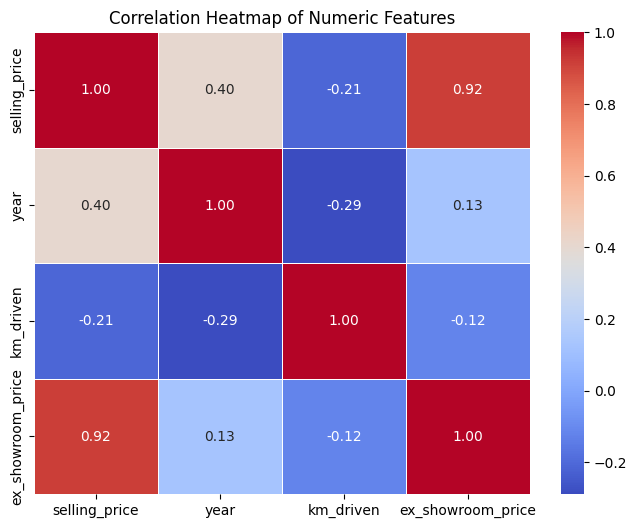

In [14]:
#9. Generate a heatmap of the correlation matrix for all numeric columns.
#What correlations stand out the most?

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
#10.Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

The analysis of the Bike Details dataset shows that the most important factors affecting a bike’s selling price are its **year of manufacture, kilometers driven, ownership type, and seller type**. Newer bikes with lower mileage and fewer previous owners generally sell at higher prices, while dealers often list bikes at higher prices than individuals. During data cleaning, missing values were handled using median (for numerical) and mode (for categorical) imputation, and unrealistic outliers in `km_driven` were removed using the IQR method. Feature engineering steps included one-hot encoding of categorical variables such as `seller_type`, ensuring the data was ready for further modeling and analysis.
